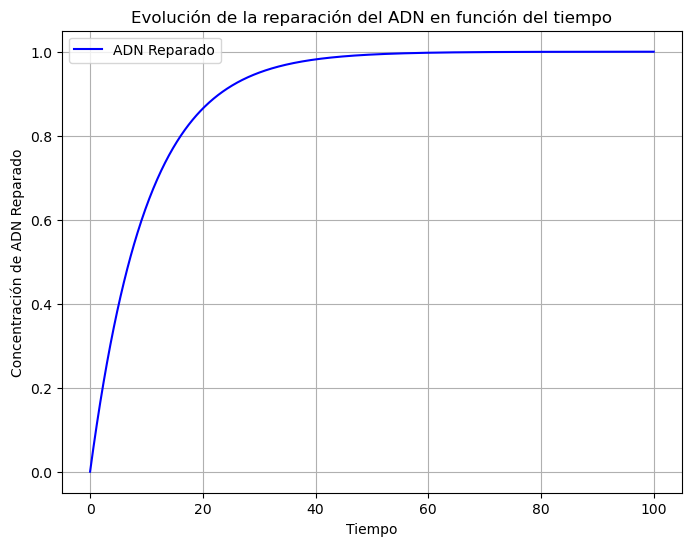

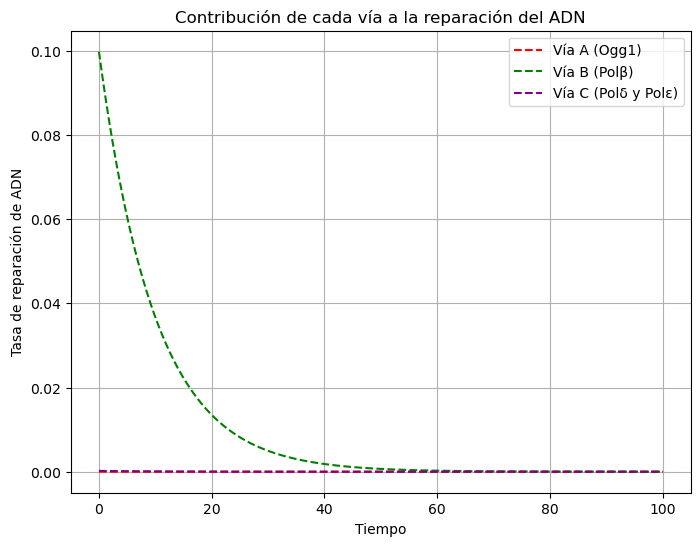

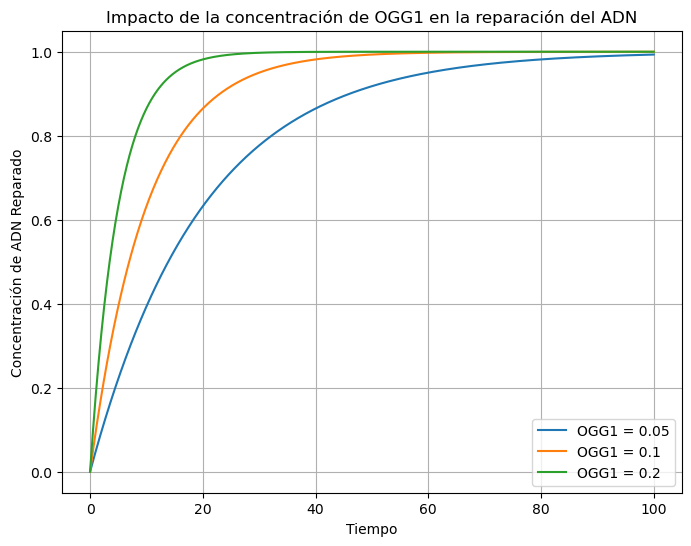

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir las tasas de reacción para cada vía basada en la contribución porcentual
def ber_model(y, t, k_A, k_B, k_C):
    DNA_damaged = y[0]  # ADN dañado
    DNA_repaired = y[1]  # ADN reparado
    
    # Ecuaciones diferenciales para la reparación
    dDNA_damaged_dt = - (k_A + k_B + k_C) * DNA_damaged
    dDNA_repaired_dt = (k_A + k_B + k_C) * DNA_damaged
    
    return [dDNA_damaged_dt, dDNA_repaired_dt]

# Parámetros del modelo basados en la contribución de cada vía
contribution_A = 0.00788 / 100
contribution_B = 99.79 / 100
contribution_C = 0.201 / 100

# Definir tasas de reparación para cada vía (valores arbitrarios ajustables)
k_total = 0.1  # Tasa total de reparación
k_A = k_total * contribution_A
k_B = k_total * contribution_B
k_C = k_total * contribution_C

# Condiciones iniciales
DNA_damaged_0 = 1.0  # Concentración inicial de ADN dañado (arbitraria)
DNA_repaired_0 = 0.0  # No hay ADN reparado al inicio

# Vector de tiempo
t = np.linspace(0, 100, 1000)

# Resolver la ecuación diferencial para cada vía
solution = odeint(ber_model, [DNA_damaged_0, DNA_repaired_0], t, args=(k_A, k_B, k_C))

# Extraer los resultados
DNA_damaged = solution[:, 0]
DNA_repaired = solution[:, 1]

# Graficar la concentración de ADN reparado en función del tiempo
plt.figure(figsize=(8, 6))
plt.plot(t, DNA_repaired, label='ADN Reparado', color='blue')
plt.xlabel('Tiempo')
plt.ylabel('Concentración de ADN Reparado')
plt.title('Evolución de la reparación del ADN en función del tiempo')
plt.legend()
plt.grid()
plt.show()

# Graficar la contribución de cada vía
plt.figure(figsize=(8, 6))
plt.plot(t, k_A * DNA_damaged, label='Vía A (Ogg1)', linestyle='--', color='red')
plt.plot(t, k_B * DNA_damaged, label='Vía B (Polβ)', linestyle='--', color='green')
plt.plot(t, k_C * DNA_damaged, label='Vía C (Polδ y Polε)', linestyle='--', color='purple')
plt.xlabel('Tiempo')
plt.ylabel('Tasa de reparación de ADN')
plt.title('Contribución de cada vía a la reparación del ADN')
plt.legend()
plt.grid()
plt.show()

# Evaluación del efecto de OGG1
def ogg1_impact(y, t, k_ogg1):
    DNA_damaged = y[0]
    DNA_repaired = y[1]
    dDNA_damaged_dt = -k_ogg1 * DNA_damaged
    dDNA_repaired_dt = k_ogg1 * DNA_damaged
    return [dDNA_damaged_dt, dDNA_repaired_dt]

# Variaciones en la concentración de OGG1
ogg1_levels = [0.05, 0.1, 0.2]  # Valores arbitrarios
plt.figure(figsize=(8, 6))
for k_ogg1 in ogg1_levels:
    solution_ogg1 = odeint(ogg1_impact, [DNA_damaged_0, DNA_repaired_0], t, args=(k_ogg1,))
    plt.plot(t, solution_ogg1[:, 1], label=f'OGG1 = {k_ogg1}')

plt.xlabel('Tiempo')
plt.ylabel('Concentración de ADN Reparado')
plt.title('Impacto de la concentración de OGG1 en la reparación del ADN')
plt.legend()
plt.grid()
plt.show()
